In [92]:
import coba as cb
import pandas as pd
import numpy as np

# Offline Learning

In [ ]:
res = cb.Result.from_file("../logs/2/offnp-baseline.log.gz")
res.interactions.to_pandas().loc[0,['[0]-auc0','[0]-bal0','[1]-auc0','[1]-bal0']] #type: ignore

[0]-auc0        0.5
[0]-bal0    0.51341
[1]-auc0        0.5
[1]-bal0    0.47451
Name: 0, dtype: object

In [ ]:
res = cb.Result.from_file("../logs/2/offnp-feats.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df['[0,1]-auc-h'] =2/(1/df["[0,1]-auc0"]+1/df["[0,1]-auc1"])

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")
df = df[df["v"]==2]

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])#[[0,9,3,7,6,5,4,2,1]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist() )

n=4
format_and_print(n,df,"[0]-auc0","g[0]-auc0",None)
print()
format_and_print(n,df,"[1]-auc0",None,"g[1]-auc0")
print()
format_and_print(n,df,"[0,1]-auc-h","g[0,1]-auc0","g[0,1]-auc1")

[0]-auc0
0.565 [0.4, 0.57, 0.75] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '300', '300', '0', 'False', 'True', 'del']
0.56 [0.37, 0.56, 0.75] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '300', '0', 'False', 'True', 'del']
0.559 [0.4, 0.56, 0.73] [0.0, 0.0, 0.0] ['True', '0', '0', '300', '0', '300', '300', '300', '0', 'False', 'True', 'del']
0.557 [0.4, 0.56, 0.69] [0.0, 0.0, 0.0] ['True', '0', '0', '300', '300', '300', '0', '300', '0', 'True', 'True', 'del']

[1]-auc0
0.603 [0.0, 0.0, 0.0] [0.31, 0.57, 0.88] ['True', '0', '0', '0', '0', '300', '300', '300', '0', 'False', 'True', 'del']
0.602 [0.0, 0.0, 0.0] [0.33, 0.58, 0.93] ['True', '0', '0', '300', '300', '300', '0', '0', '0', 'True', 'True', 'del']
0.595 [0.0, 0.0, 0.0] [0.42, 0.56, 0.87] ['True', '300', '0', '300', '300', '300', '0', '0', '0', 'False', 'True', 'del']
0.595 [0.0, 0.0, 0.0] [0.32, 0.61, 0.92] ['True', '0', '300', '0', '0', '0', '300', '300', '0', 'False', 'True', 'del']

[0,1]-auc-h
0.

In [96]:
res = cb.Result.from_file("../logs/2/offnp-ae-interest.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])[[0,9,3,7,6,5,4,2,1,10]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist(), _x["v"], _x["s1"])

format_and_print(10,df,"[0]-auc0","g[0]-auc0",None)

[0]-auc0
0.581 [0.43, 0.58, 0.75] [0.0, 0.0, 0.0] ['True', 'True', '300', '0', '0', '300', '0', '300', '0', 'True'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.577 [0.41, 0.57, 0.73] [0.0, 0.0, 0.0] ['True', 'True', '300', '0', '0', '300', '0', '300', '0', 'True'] 2 ()
0.57 [0.39, 0.57, 0.72] [0.0, 0.0, 0.0] ['True', 'True', '300', '0', '0', '300', '0', '300', '0', 'True'] 2 ('x', 27, 'l', 'r', 'x')
0.561 [0.37, 0.56, 0.7] [0.0, 0.0, 0.0] ['True', 'True', '300', '0', '0', '300', '0', '300', '0', 'False'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.557 [0.38, 0.56, 0.74] [0.0, 0.0, 0.0] ['True', 'True', '300', '0', '0', '300', '0', '300', '0', 'False'] 2 ()
0.543 [0.38, 0.53, 0.74] [0.0, 0.0, 0.0] ['True', 'True', '300', '0', '0', '300', '0', '300', '0', 'False'] 2 ('x', 27, 'l', 'r', 'x')


In [168]:
res = cb.Result.from_file("../logs/2/offnp-ae-interest2.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])#[[0,9,3,7,6,5,4,2,1,10]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist(), _x["v"], _x["s1"])

format_and_print(10,df,"[0]-auc0","g[0]-auc0",None)


[0]-auc0
0.567 [0.36, 0.56, 0.76] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '0', '0', 'False', 'False', 'del'] 2 ('x', 12, 'l', 'r', 'x')
0.567 [0.4, 0.56, 0.75] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '0', '0', 'False', 'True', 'del'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.553 [0.4, 0.55, 0.74] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '0', '0', 'False', 'True', 'del'] 2 ('x', 12, 'l', 'r', 'x')
0.545 [0.42, 0.53, 0.75] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '0', '0', 'False', 'True', 'del'] 2 ()
0.539 [0.35, 0.53, 0.71] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '0', '0', 'False', 'False', 'del'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.539 [0.4, 0.54, 0.71] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '0', '0', 'False', 'False', 'del'] 2 ()


In [169]:
res = cb.Result.from_file("../logs/2/offnp-ae-interest4.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])#[[0,9,3,7,6,5,4,2,1,10]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist(), _x["v"], _x["s1"])

format_and_print(10,df,"[0]-auc0","g[0]-auc0",None)

#0.589 [0.41, 0.59, 0.75] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '300', '0', 'False', 'True', 'del'] 2 ()


[0]-auc0
0.571 [0.42, 0.57, 0.74] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '300', '0', 'False', 'True', 'del'] 2 ('x', 12, 'l', 'r', 'x')
0.56 [0.4, 0.55, 0.75] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '300', '0', 'False', 'True', 'del'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.548 [0.37, 0.54, 0.71] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '300', '0', 'False', 'True', 'del'] 2 ()
0.546 [0.39, 0.53, 0.69] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '300', '0', 'False', 'False', 'del'] 2 ()
0.542 [0.39, 0.53, 0.69] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '300', '0', 'False', 'False', 'del'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.541 [0.4, 0.53, 0.71] [0.0, 0.0, 0.0] ['True', '0', '300', '300', '0', '300', '0', '300', '0', 'False', 'False', 'del'] 2 ('x', 12, 'l', 'r', 'x')


In [179]:
res = cb.Result.from_file("../logs/2/offnp-ae-interest.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])[[0,9,3,7,6,5,4,2,1,10]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist(), _x["v"], _x["s1"])

format_and_print(10,df,"[0]-auc0","g[0]-auc0",None)

[0]-auc0
0.562 [0.38, 0.55, 0.74] [0.0, 0.0, 0.0] ['True', 'False', '300', '300', '0', '300', '0', '300', '0', 'True'] 2 ('x', 25, 'l', 'r', 'x')
0.561 [0.4, 0.55, 0.74] [0.0, 0.0, 0.0] ['True', 'False', '300', '300', '0', '300', '0', '300', '0', 'False'] 2 ('x', 25, 'l', 'r', 'x')
0.559 [0.38, 0.56, 0.74] [0.0, 0.0, 0.0] ['True', 'False', '300', '300', '0', '300', '0', '300', '0', 'True'] 2 ()
0.552 [0.36, 0.56, 0.73] [0.0, 0.0, 0.0] ['True', 'False', '300', '300', '0', '300', '0', '300', '0', 'True'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.551 [0.37, 0.55, 0.72] [0.0, 0.0, 0.0] ['True', 'False', '300', '300', '0', '300', '0', '300', '0', 'False'] 2 ()
0.535 [0.34, 0.55, 0.69] [0.0, 0.0, 0.0] ['True', 'False', '300', '300', '0', '300', '0', '300', '0', 'False'] 2 ('x', 0.2, 120, 'l', 'r', 'x')


In [ ]:
res = cb.Result.from_file("../logs/2/offnp-ae-interest2.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])[[0,9,3,7,6,5,4,2,1,10]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist(), _x["v"], _x["s1"])

format_and_print(10,df,"[0]-auc0","g[0]-auc0",None)

In [135]:
res = cb.Result.from_file("../logs/2/offnp-ae-response.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])[[0,9,3,7,6,5,4,2,1,10]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist(), _x["v"], _x["s1"])

format_and_print(10,df,"[1]-auc0","g[1]-auc0",None)
# print()
# format_and_print(5,df,"[1]-auc0",None,"g[1]-auc0")
# print()
# format_and_print(5,df,"[0,1]-auc-h","g[0,1]-auc0","g[0,1]-auc1")

[1]-auc0
0.631 [0.43, 0.61, 0.89] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'True'] 2 ('x', 30, 'l', 'r', 'x')
0.629 [0.4, 0.64, 0.87] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'True'] 2 ()
0.626 [0.42, 0.6, 0.8] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'False'] 2 ('x', 30, 'l', 'r', 'x')
0.623 [0.37, 0.6, 0.89] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'False'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.618 [0.35, 0.62, 0.85] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'True'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.616 [0.41, 0.61, 0.84] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'False'] 2 ()


In [ ]:
res = cb.Result.from_file("../logs/2/offnp-ae-response2.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])[[0,9,3,7,6,5,4,2,1,10]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist(), _x["v"], _x["s1"])

format_and_print(10,df,"[1]-auc0","g[1]-auc0",None)
# print()
# format_and_print(5,df,"[1]-auc0",None,"g[1]-auc0")
# print()
# format_and_print(5,df,"[0,1]-auc-h","g[0,1]-auc0","g[0,1]-auc1")
#['True', '300', '300', '0', '300', '0', '300', '300', '0', 'False', 'True', 'del'] 0.615 [0, 0, 0] [0.44, 0.59, 0.8]

[1]-auc0
0.643 [0.41, 0.6, 0.9] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '0', '300', '300', '300', 'False'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.642 [0.39, 0.57, 0.9] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '0', '300', '300', '300', 'True'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.634 [0.41, 0.57, 0.86] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '0', '300', '300', '300', 'True'] 2 ()
0.624 [0.41, 0.56, 0.85] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '0', '300', '300', '300', 'False'] 2 ('x', 27, 'l', 'r', 'x')
0.621 [0.37, 0.54, 0.89] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '0', '300', '300', '300', 'True'] 2 ('x', 27, 'l', 'r', 'x')
0.614 [0.39, 0.56, 0.85] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '0', '300', '300', '300', 'False'] 2 ()


In [127]:
res = cb.Result.from_file("../logs/2/offnp-ae-response.log.gz")

df  = res.interactions.to_pandas()
env = res.environments.to_pandas()
val = res.evaluators.to_pandas()

df = df[df["index"]==1]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")

def format_and_print(n,df,opt,interest,response):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    interest = interest or ''
    response = response or ''

    if interest not in df: df[interest] = [[0]]*len(df)
    if response not in df: df[response] = [[0]]*len(df)

    out = df.groupby(["trn","s1","v"]).agg({opt:'mean', interest: 'sum', response: 'sum'}).reset_index()

    out = out.sort_values(opt,ascending=False).head(n=n)[["trn","s1","v",opt,interest,response]]
    out = [o for _,o in out.iterrows()]
    for o in out: o["trn"] = np.array(o["trn"])[[0,9,3,7,6,5,4,2,1,10]]
    print(opt)
    for _x in out: print(round(_x[opt],3), get_pct(_x[interest]), get_pct(_x[response]), _x["trn"].tolist(), _x["v"], _x["s1"])

format_and_print(10,df,"[1]-auc0","g[1]-auc0",None)

[1]-auc0
0.631 [0.43, 0.61, 0.89] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'True'] 2 ('x', 30, 'l', 'r', 'x')
0.629 [0.4, 0.64, 0.87] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'True'] 2 ()
0.626 [0.42, 0.6, 0.8] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'False'] 2 ('x', 30, 'l', 'r', 'x')
0.623 [0.37, 0.6, 0.89] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'False'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.618 [0.35, 0.62, 0.85] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'True'] 2 ('x', 0.2, 120, 'l', 'r', 'x')
0.616 [0.41, 0.61, 0.84] [0.0, 0.0, 0.0] ['True', 'False', '0', '300', '300', '300', '300', '120', '120', 'False'] 2 ()


In [131]:
def filt(env):
    print(env)
    return 120 not in [-2]
res.filter_env(lambda env: 120 in env[-2])

{'Learners': 1, 'Environments': 30, 'Interactions': 180}


# Online Learning

In [98]:
import matplotlib.pyplot as plt
import coba as cb
L = ['evaluator_id','s1','s2','s3','dae','ws','pers','y','trn','n_models','weighted']
res = cb.Result.from_file('../logs/2/onp-feats.log.gz').filter_fin(l=L,p=['l','g','rng'])

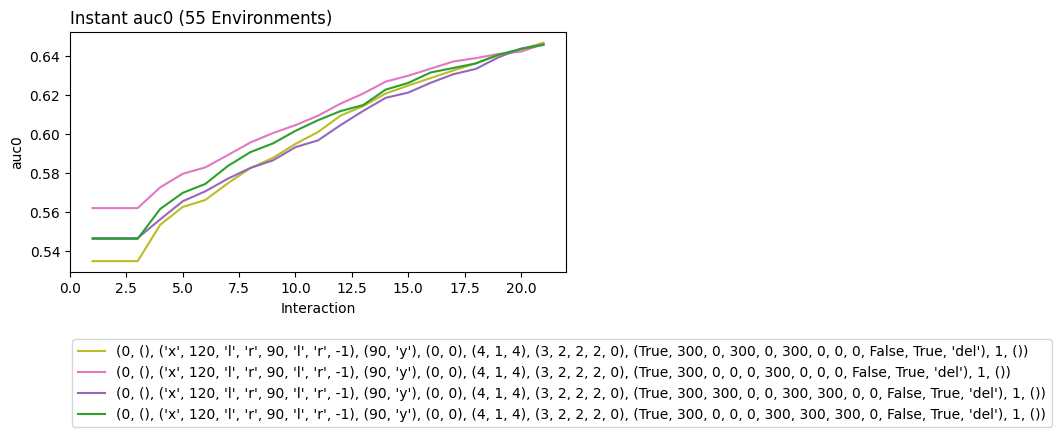

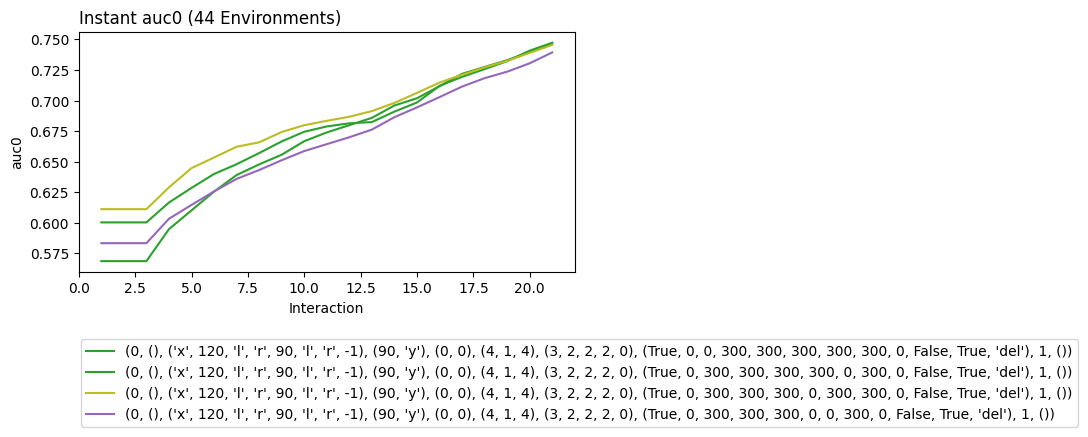

In [74]:
# with basis learning and warm-started head
res0 = res.where(evaluator_id=0)
res0.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)
res0.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)

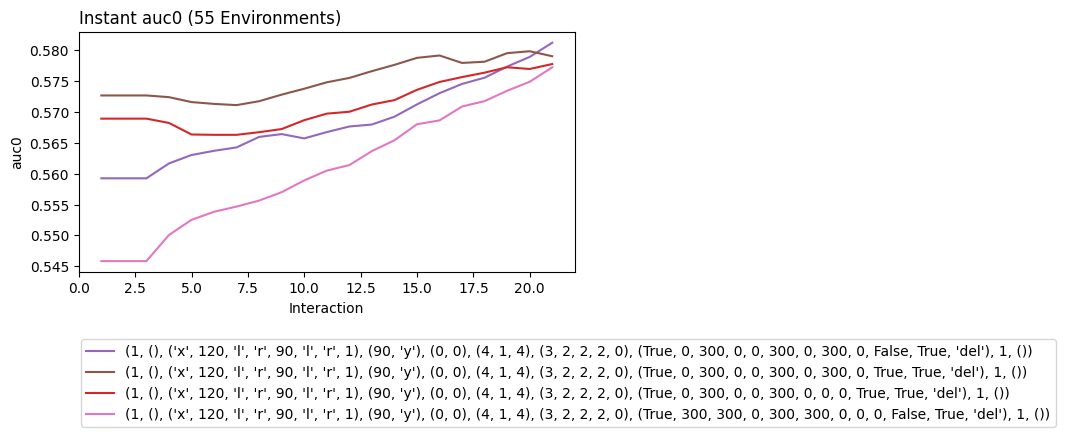

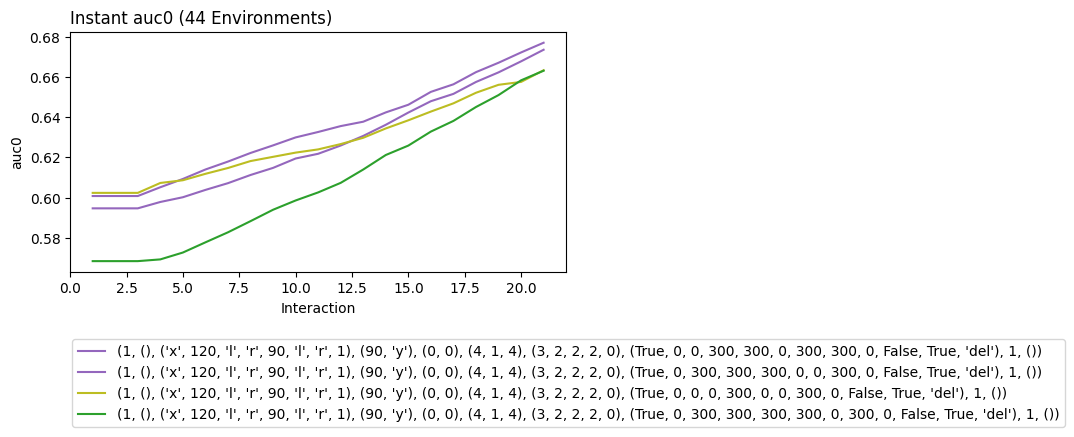

In [75]:
# with average learning and warm-started head
res1 = res.where(evaluator_id=1)
res1.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)
res1.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)

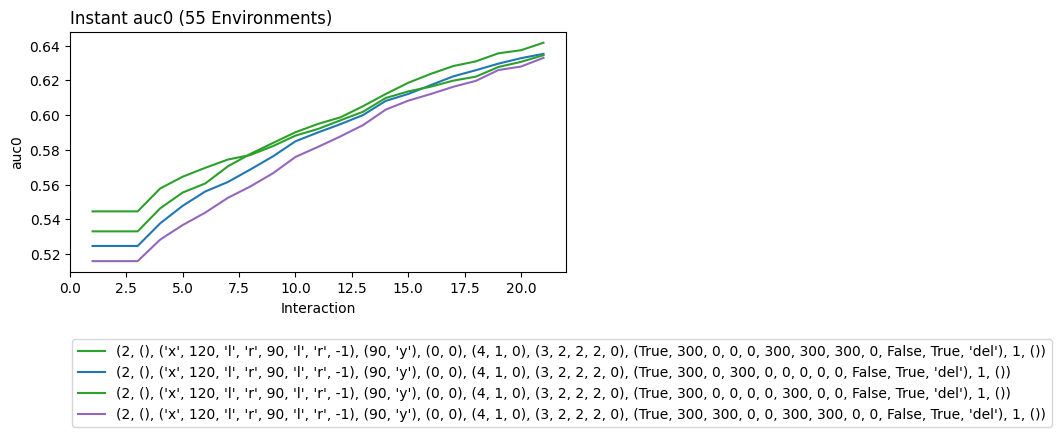

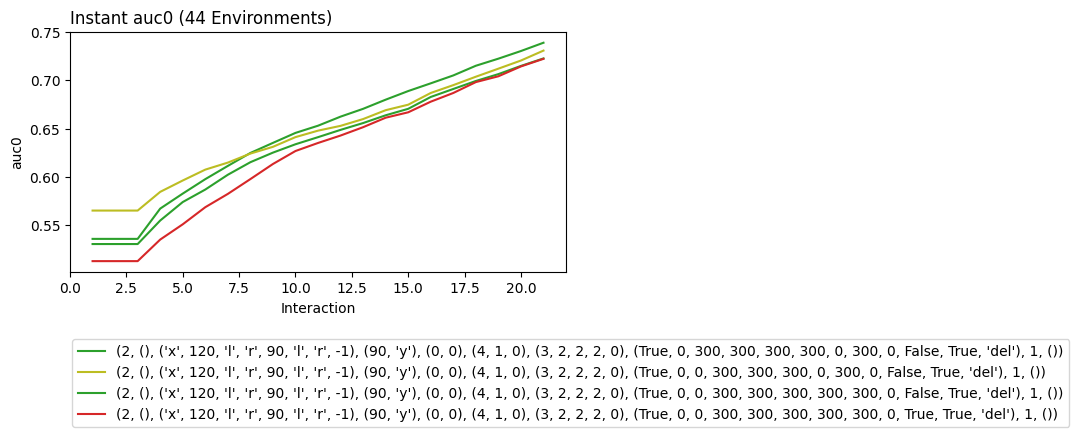

In [76]:
# with basis learning and personalized only
res2 = res.where(evaluator_id=2)
res2.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)
res2.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)

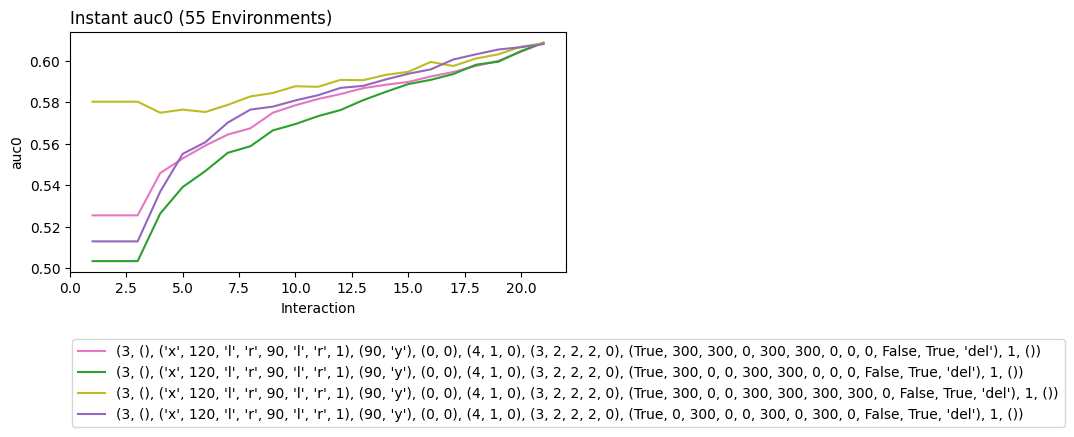

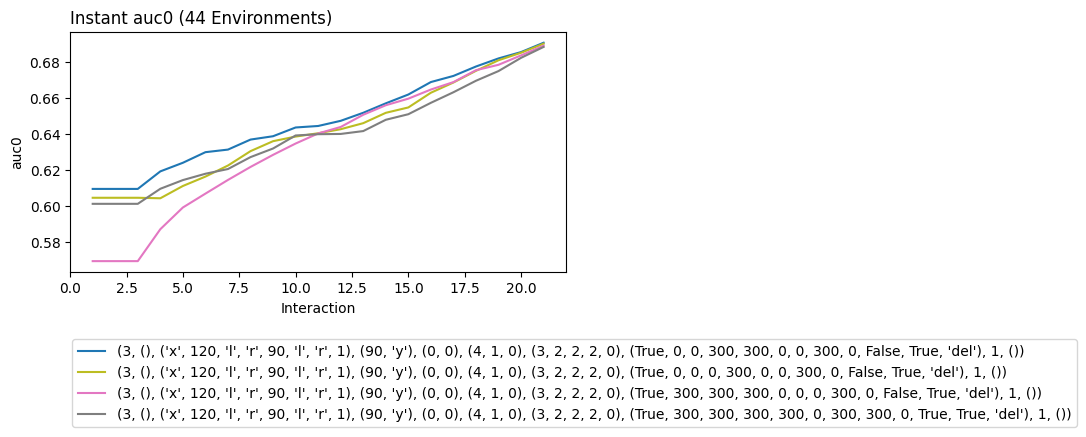

In [77]:
# with average learning and personalized only
res3 = res.where(evaluator_id=3)
res3.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)
res3.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)

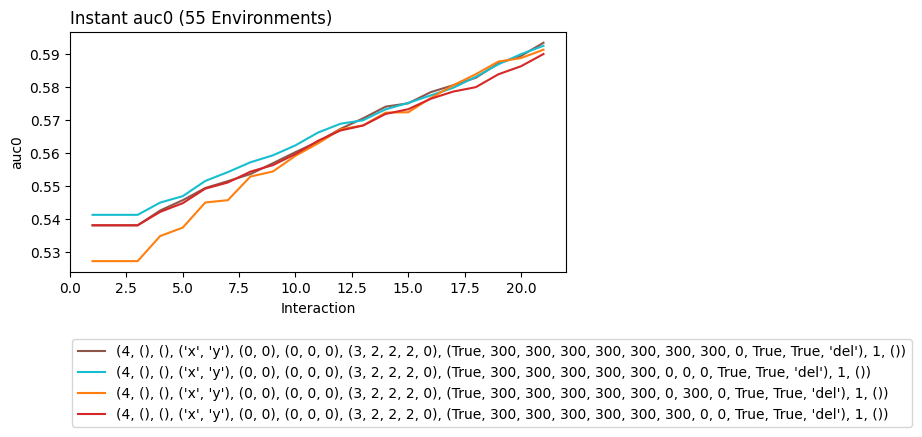

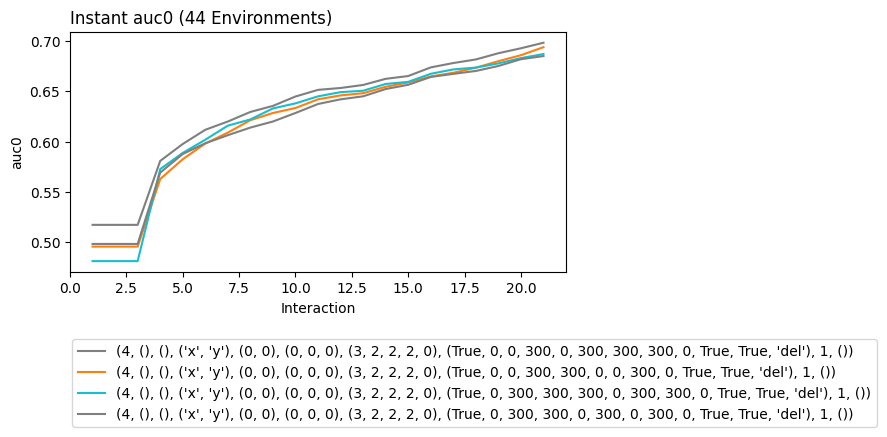

In [ ]:
# personalized only (linear)
res4 = res.where(evaluator_id=4)
res4.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)
res4.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)

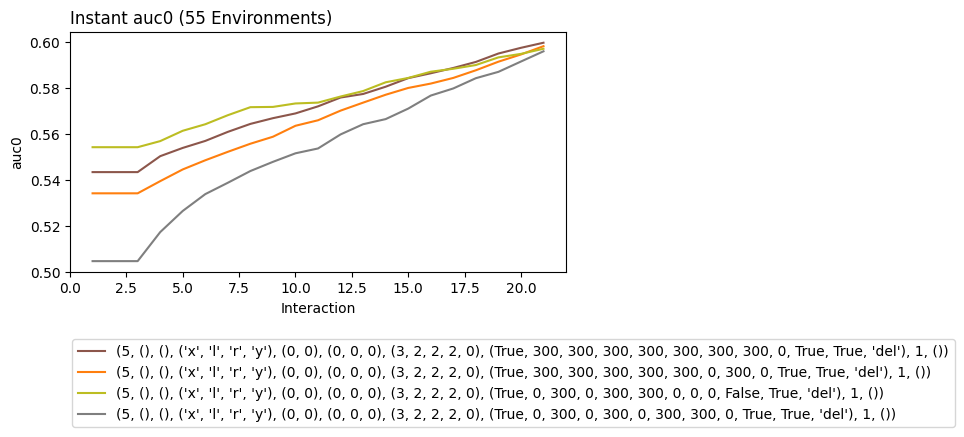

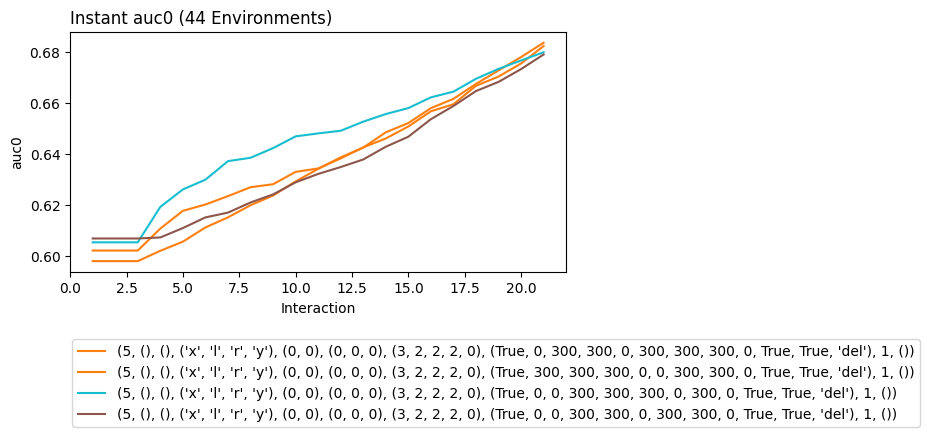

In [ ]:
# personalized only (two-layer)
res5 = res.where(evaluator_id=5)
res5.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)
res5.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)

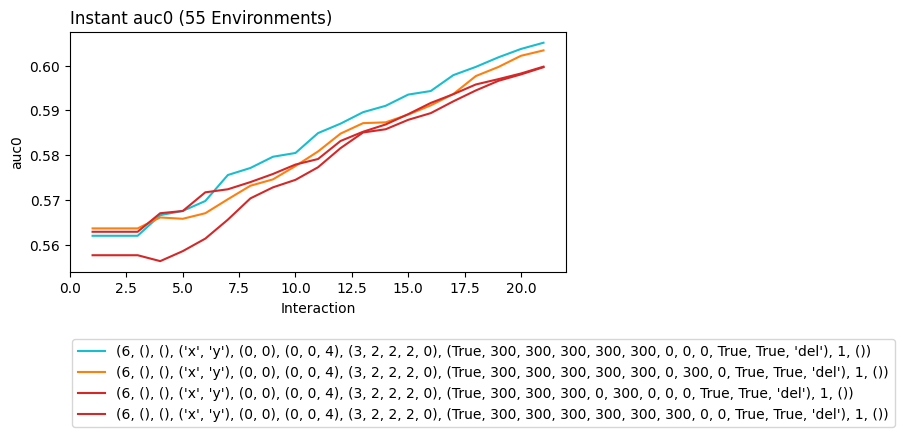

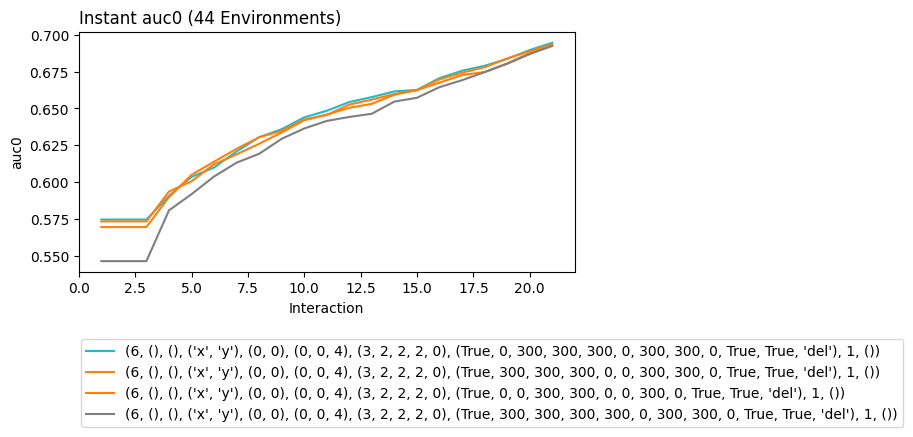

In [118]:
# warm-start + personalized (one-layer)
res6 = res.where(evaluator_id=6)
res6.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)
res6.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)

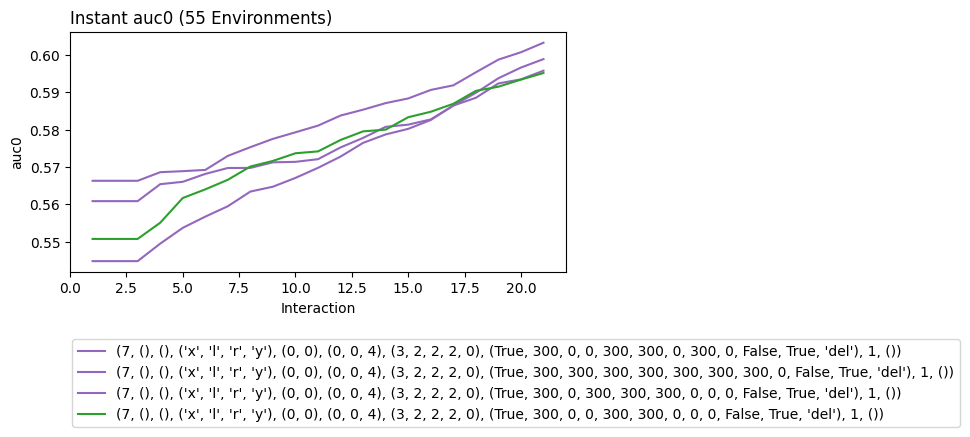

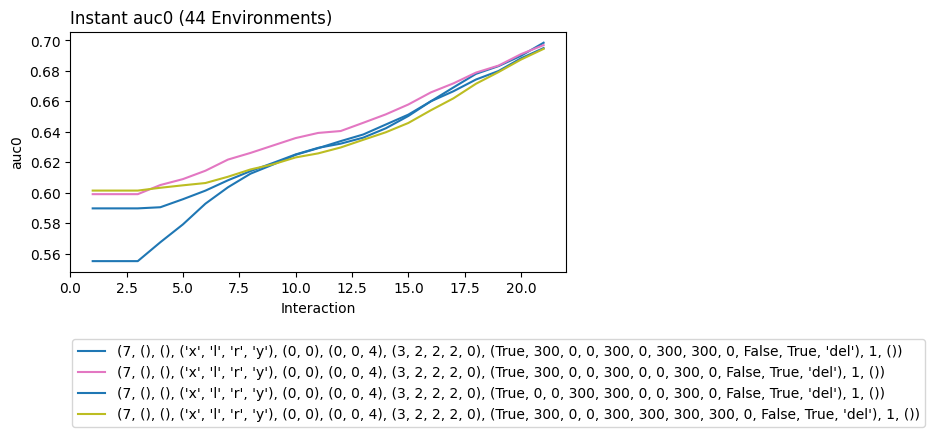

In [119]:
# warm-start + personalized (two-layer)
res7 = res.where(evaluator_id=7)
res7.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)
res7.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=4)

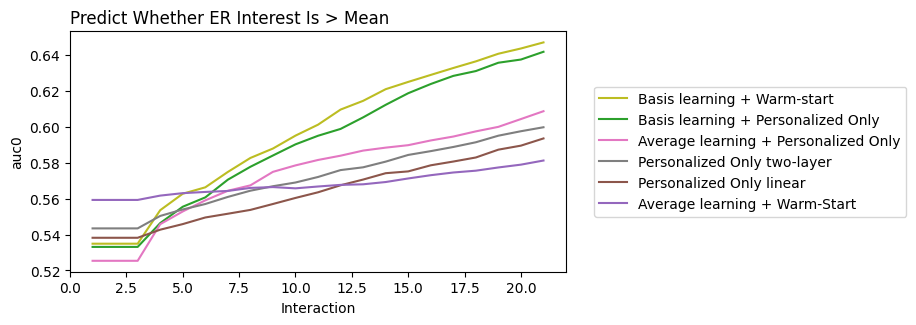

In [122]:
# # with basis learning and warm-started head
# res0 = res.where(evaluator_id=0)

# # with average learning and warm-started head
# res1 = res.where(evaluator_id=1)

# # with basis learning and personalized only
# res2 = res.where(evaluator_id=2)

# # with average learning and personalized only
# res3 = res.where(evaluator_id=3)

# # personalized only (linear)
# res4 = res.where(evaluator_id=4)

# # personalized only (two-layer)
# res5 = res.where(evaluator_id=5)

res0.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)
res2.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)
res3.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)
res5.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None,colors=2)
res4.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)
res1.where(l={"=":(0,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)

plt.legend(labels=[
    'Basis learning + Warm-start',
    'Basis learning + Personalized Only',
    'Average learning + Personalized Only',
    'Personalized Only two-layer',
    'Personalized Only linear',
    'Average learning + Warm-Start',
], loc="center right", bbox_to_anchor=(1.70,.5) )

plt.title("Predict Whether ER Interest Is > Mean",loc='left')
plt.show()

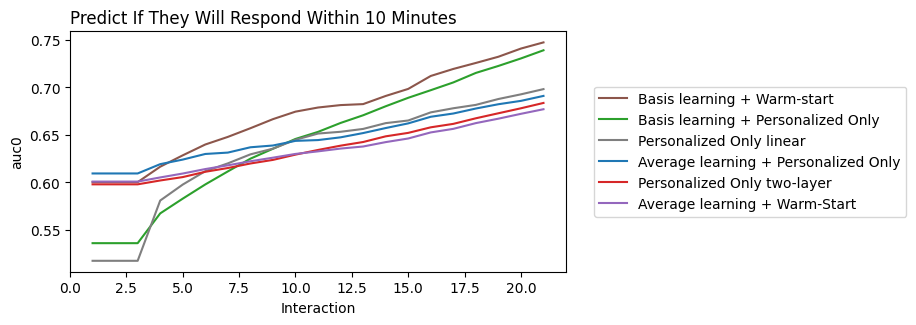

In [ ]:
# # with basis learning and warm-started head
# res0 = res.where(evaluator_id=0)

# # with average learning and warm-started head
# res1 = res.where(evaluator_id=1)

# # with basis learning and personalized only
# res2 = res.where(evaluator_id=2)

# # with average learning and personalized only
# res3 = res.where(evaluator_id=3)

# # personalized only (linear)
# res4 = res.where(evaluator_id=4)

# # personalized only (two-layer)
# res5 = res.where(evaluator_id=5)

res0.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None,colors=3)
res2.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)
res4.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)
res3.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)
res5.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None,colors=2)
res1.where(l={"=":(1,)}).plot_learners('index','auc0',l=L,p=['g','rng'],span=1,top_n=1,out=None)

plt.legend(labels=[
    'Basis learning + Warm-start',
    'Basis learning + Personalized Only',
    'Personalized Only linear',
    'Average learning + Personalized Only',
    'Personalized Only two-layer',
    'Average learning + Warm-Start',
], loc="center right", bbox_to_anchor=(1.70,.5) )

plt.title("Predict If They Will Respond Within 10 Minutes",loc='left')
plt.show()

In [88]:
import pandas as pd

res0 = res.where(evaluator_id=0)

df  = res0.interactions.to_pandas()
env = res0.environments.to_pandas()
val = res0.evaluators.to_pandas()

df = df[df["index"]==21]
df = pd.merge(df,env,on="environment_id")
df = pd.merge(df,val,on="evaluator_id")
df = df[df["v"]==2]

In [90]:
df.shape

(25344, 31)

In [126]:
def format_and_print(n,res):
    get_pct = lambda vals: np.nanpercentile(vals,[10,50,90]).round(2).tolist()

    df  = res.interactions.to_pandas()
    env = res.environments.to_pandas()
    val = res.evaluators.to_pandas()

    df = df[df["index"]==21]
    df = pd.merge(df,env,on="environment_id")
    df = pd.merge(df,val,on="evaluator_id")

    df["gauc0"] = [[a] for a in df["auc0"] ]

    out = df.groupby(["trn","s1","v"]).agg({"auc0":'mean', "gauc0":'sum'}).reset_index()
    out = out.sort_values("auc0",ascending=False).head(n=n)[["trn","s1","v","auc0","gauc0"]]
    out = [r[1] for r in out.iterrows()]
    
    for o in out: o["trn"] = np.array(o["trn"])#[[0,9,3,7,6,5,4,2,1,10]]
    for _x in out: print(round(_x["auc0"],3), get_pct(_x["gauc0"]),  _x["trn"].tolist())

    return df

model_names = [
    "basis + warm-start",
    "average + warm-start",
    "basis + cold-start",
    "average + cold-start",
    "cold-start (linear)",
    "cold-start (2-layer)",
    "warm-start (linear)",
    "warm-start (2-layer)"
]

n = 4

print("----Interest----")
interest = res.where(l={"=":(0,)})
for i in range(8):
    print()
    print(model_names[i])
    df = format_and_print(n,interest.where(evaluator_id=i))

print()
print("----Response----")
response = res.where(l={"=":(1,)})
for i in range(8):
    print()
    print(model_names[i])
    df = format_and_print(n,response.where(evaluator_id=i))

----Interest----

basis + warm-start
0.647 [0.52, 0.61, 0.83] ['True', '300', '0', '300', '0', '300', '0', '0', '0', 'False', 'True', 'del']
0.646 [0.49, 0.64, 0.8] ['True', '300', '0', '0', '0', '300', '0', '0', '0', 'False', 'True', 'del']
0.646 [0.51, 0.64, 0.82] ['True', '300', '300', '0', '0', '300', '300', '0', '0', 'False', 'True', 'del']
0.646 [0.48, 0.63, 0.81] ['True', '300', '0', '0', '0', '300', '300', '300', '0', 'False', 'True', 'del']

average + warm-start
0.581 [0.45, 0.57, 0.73] ['True', '0', '300', '0', '0', '300', '0', '300', '0', 'False', 'True', 'del']
0.579 [0.4, 0.57, 0.77] ['True', '0', '300', '0', '0', '300', '0', '300', '0', 'True', 'True', 'del']
0.578 [0.41, 0.59, 0.74] ['True', '0', '300', '0', '0', '300', '0', '0', '0', 'True', 'True', 'del']
0.577 [0.44, 0.58, 0.72] ['True', '300', '300', '0', '300', '300', '0', '0', '0', 'False', 'True', 'del']

basis + cold-start
0.642 [0.51, 0.61, 0.8] ['True', '300', '0', '0', '0', '300', '300', '300', '0', 'False', '